In [37]:
import numpy as np
import pandas as pd

results05 = np.loadtxt('eggholder05')
resultsIsolated = np.loadtxt('eggholderisolated')
resultsRandom = np.loadtxt('eggholderrandom')
resultsBest = np.loadtxt('eggholderbest')
resultseggholderbestSimAnneal = np.loadtxt('eggholderbestSimAnneal')
resultseggholderIsolatedSimAnneal = np.loadtxt('eggholderIsolatedSimAnneal')

In [38]:
global df

def ArraytoDF(resultsArray, methodName):
    
    df = pd.DataFrame(columns=['ExperimentNo', 'Iteration', 'Accuracy', 'Method'])   
    
    for i in range(21):
        for j in range(21):
            df = df.append({'ExperimentNo':i+1, 'Iteration':j+1, 'Accuracy':resultsArray[i][j]*100, 'Method':methodName}, ignore_index=True)
        
    
    return df

In [39]:
Results_DF = [ArraytoDF(results05, 'Exploitation (p=0.5)'),
              ArraytoDF(resultsIsolated, 'Exploration (Most Isolated)'),
              ArraytoDF(resultsRandom, 'Random Selection'),
              ArraytoDF(resultsBest, 'Best ( (0.5 - |0.5-p|) x d)'),
              ArraytoDF(resultseggholderbestSimAnneal, 'Best + Simulated Annealing'),
              ArraytoDF(resultseggholderIsolatedSimAnneal, 'Most Isolated + Simulated Annealing')
              ]

In [40]:
Results_DF = pd.concat(Results_DF)

In [41]:
testin = Results_DF[(Results_DF['Iteration'] == 1)|(Results_DF['Iteration'] == 6)|(Results_DF['Iteration'] == 11)|(Results_DF['Iteration'] == 16)|(Results_DF['Iteration'] == 21)]

In [48]:
(Results_DF[(Results_DF['Iteration'] == 21)]['Accuracy'].median())-(Results_DF[(Results_DF['Iteration'] == 1)]['Accuracy'].median())

0.960769845661936

In [24]:
import numpy as np
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the widths of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

<ipython-input-24-a77ef4e19432>:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


Text(0, 0.5, 'Accuracy (%)')

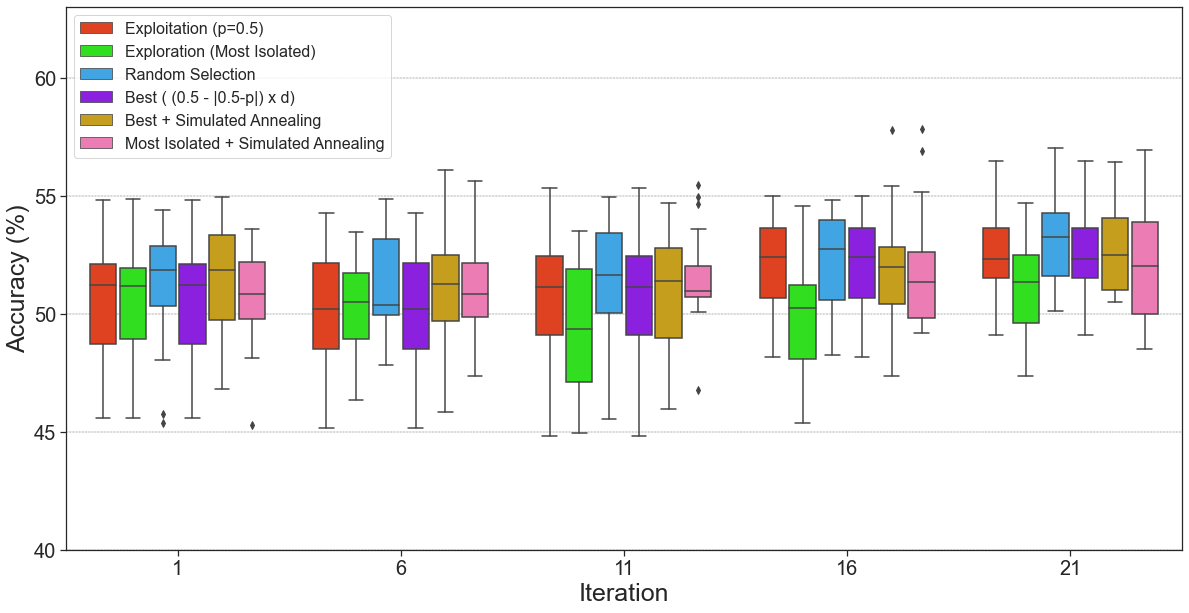

In [36]:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pylab as pylab
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
data = testin
palette = {'Exploitation (p=0.5)': '#ff2d00', 'Exploration (Most Isolated)': '#18ff00','Random Selection': '#26abff',
           'Best ( (0.5 - |0.5-p|) x d)': '#9000ff','Best + Simulated Annealing': '#e1ad01','Most Isolated + Simulated Annealing': '#ff69b4'}
# Draw a nested boxplot to show bills by day and time

fig, ax = pyplot.subplots(figsize=(20,10))
plt = sns.boxplot(x="Iteration", y="Accuracy",data=data,
            hue="Method", palette=palette, ax=ax)
ax.set(ylim=(40,63))

plt.legend(loc=2, prop={'size': 16})

plt.axis

adjust_box_widths(fig, 0.9)

ax.xaxis.label.set_size(25)
ax.yaxis.label.set_size(25)
plt.grid(axis = 'y', color = 'black', linestyle = '-.', linewidth = 0.3)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel('Accuracy (%)')


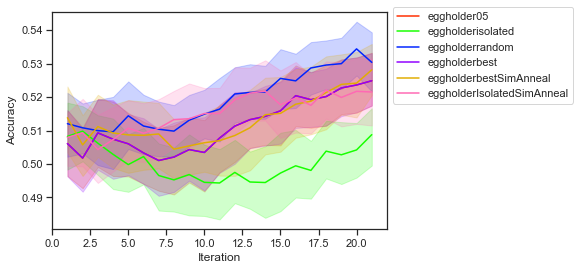

In [18]:
data = Results_DF

ax1 = sns.lineplot(x='Iteration', y='Accuracy', data=data, hue='Method', palette=palette)
ax1.legend(loc='center left', bbox_to_anchor=(1, .8), ncol=1)
